In [1]:
import scipy
import logging
import atlite
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from init import *

In [3]:
from src.config import *

In [4]:
from src.load_data import *

In [98]:
# this is not really needed if we have a complete solution and concat script is executed

import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution"  / "*.nc"))
solution = xr.open_mfdataset(fnames)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
pv_mean = load_pv().sel(x=solution.x, y=solution.y).load().mean(dim='time').compute()

In [109]:
wind_mean = load_wind().sel(x=solution.x, y=solution.y).load().mean(dim='time').compute()

Text(0, 0.5, 'Size Solar PV (KW)')

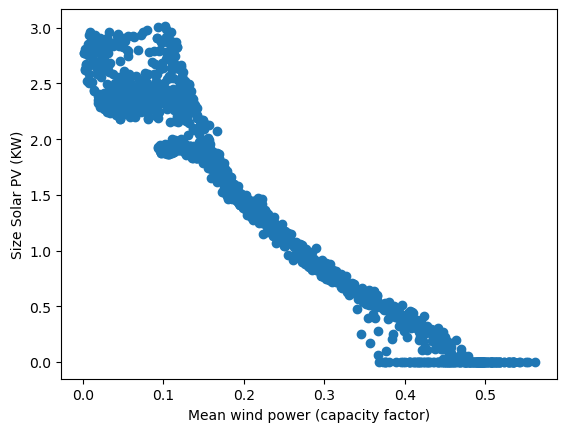

In [124]:
plt.scatter(wind_mean, solution.size_solar_pv.transpose('y', 'x'))
plt.xlabel('Mean wind power (capacity factor)')
plt.ylabel('Size Solar PV (KW)')

Text(0.5, 0, 'Mean wind power (capacity factor)')

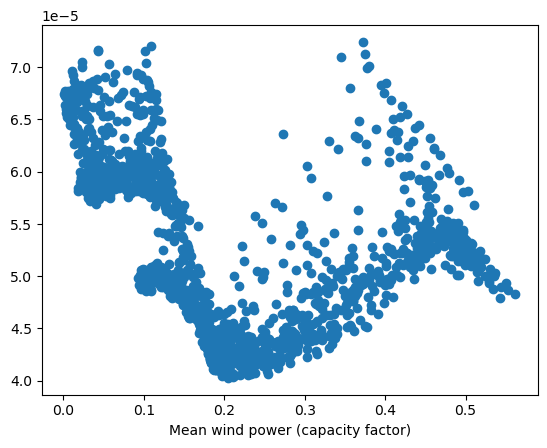

In [129]:
plt.scatter(wind_mean, solution.size_co2.transpose('y', 'x'))
plt.xlabel('Mean wind power (capacity factor)')

Text(0.5, 0, 'Mean PV (capacity factor)')

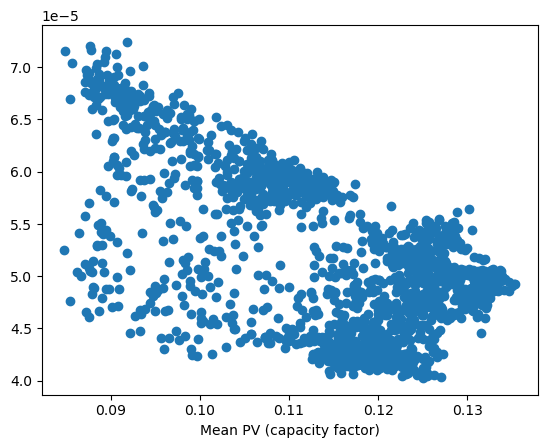

In [132]:
plt.scatter(pv_mean, solution.size_co2.transpose('y', 'x'))
plt.xlabel('Mean PV (capacity factor)')

In [90]:
wind = load_wind().isel(x=758, y=583).load()

In [91]:
pv = load_pv().isel(x=758, y=583).load()

In [92]:
import geopandas as gpd

In [93]:
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

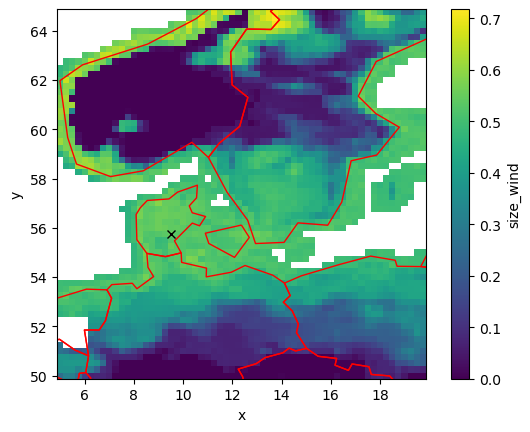

In [94]:
fig, ax = plt.subplots(1)
load_network_solution().size_wind.transpose().plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.plot(pv.x, pv.y, 'xk')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import src.model_parameters as mp

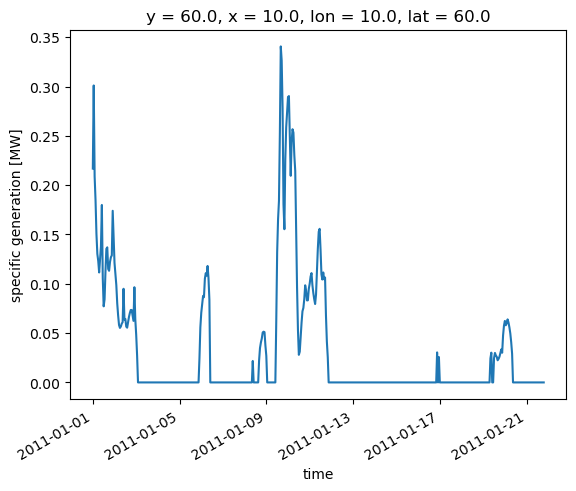

In [39]:
wind.isel(time=slice(None,500)).plot()

In [95]:
wind.mean()

<xarray.DataArray 'specific generation' ()>
array(0.29604867)
Coordinates:
    y        float64 55.75
    x        float64 9.5
    lon      float64 9.5
    lat      float64 55.75

In [96]:
# EUR/kWh
float(mp.wind_cost / wind.sum())

0.04704287481511619

In [97]:
# EUR/kWh
float(mp.pv_cost / pv.sum())

0.05194822361625819

In [57]:
mp.pv_cost

53

In [55]:
float( / pv.mean())

476.4891728440987

In [40]:
wind_global = load_wind()

[########################################] | 100% Completed | 350.64 s


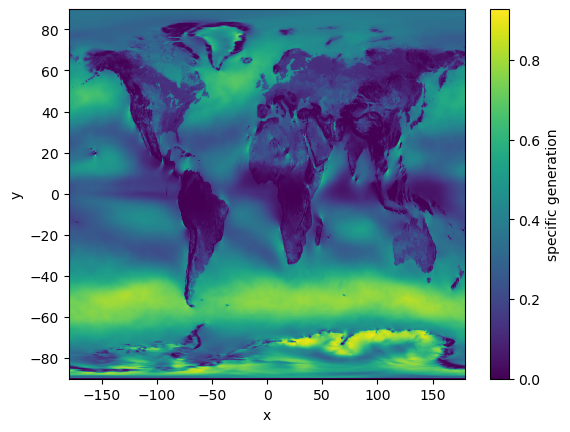

In [45]:
with da.diagnostics.ProgressBar():
    wind_global.mean(dim='time').plot()

[########################################] | 100% Completed | 124.00 s


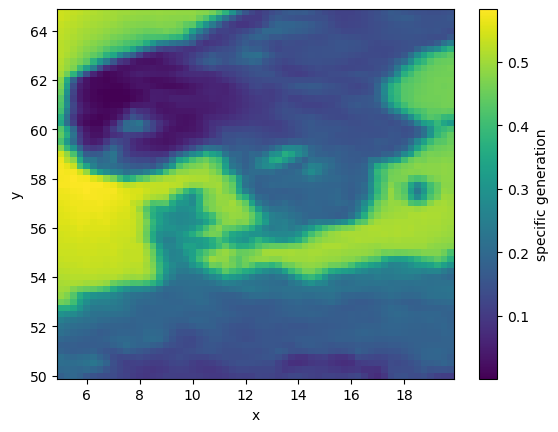

In [46]:
with da.diagnostics.ProgressBar():
    wind_global.isel(x=slice(*X_IDX_FROM_TO), y=slice(*Y_IDX_FROM_TO)).mean(dim='time').plot()

In [9]:
import glob

In [10]:
import geopandas as gpd

In [11]:
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [12]:
land_sea_mask = xr.open_dataset(INPUT_DIR / "era5" / "land_sea_mask.nc")

In [34]:
land_sea_mask.lsm

<xarray.DataArray 'lsm' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2023-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask

In [32]:
pv = xr.open_dataset(INTERIM_DIR / "pv" / "pv_2011-02.nc")

In [33]:
pv

<xarray.Dataset>
Dimensions:              (y: 720, x: 1440, time: 672)
Coordinates:
  * y                    (y) float64 -90.0 -89.75 -89.5 ... 89.25 89.5 89.75
  * x                    (x) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time                 (time) datetime64[ns] 2011-02-01 ... 2011-02-28T23:0...
    lon                  (y, x) float64 ...
    lat                  (y, x) float64 ...
Data variables:
    specific generation  (time, y, x) float64 ...

NameError: name 'land_sea_mask' is not defined

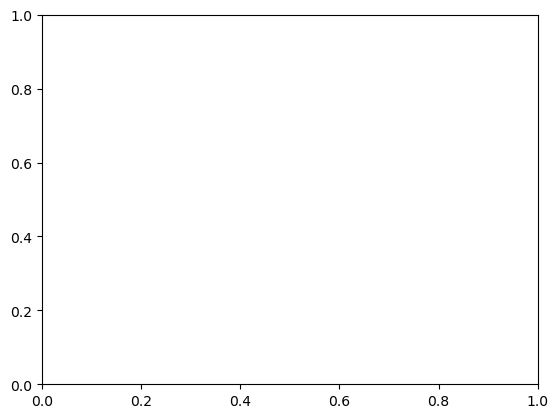

In [72]:
fig, ax = plt.subplots(1)

land_sea_mask.lsm.isel(latitude=slice(100, 160), longitude=slice(740,800)).plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)

In [56]:
solution = xr.open_dataset(INTERIM_DIR / "network_solution" / "network_solution_740_590.nc")

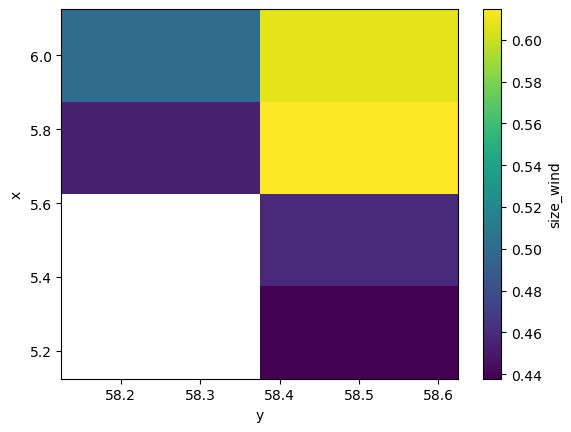

In [64]:
solution.size_wind.plot()glob

In [32]:
solution['asdf'] = 1

In [136]:
wind = xr.open_mfdataset([INTERIM_DIR / 'wind' / f'wind_2012-{month:02d}.nc' for month in MONTHS])

In [155]:
wind.isel(x=800,y=500)

<xarray.Dataset>
Dimensions:              (time: 8784)
Coordinates:
    y                    float64 35.0
    x                    float64 20.0
  * time                 (time) datetime64[ns] 2012-01-01 ... 2012-12-31T23:0...
    lon                  float64 dask.array<chunksize=(), meta=np.ndarray>
    lat                  float64 dask.array<chunksize=(), meta=np.ndarray>
Data variables:
    specific generation  (time) float64 dask.array<chunksize=(744,), meta=np.ndarray>

In [121]:
for i, (x0, x1) in enumerate(wind.isel(x=slice(0,10), y=slice(0,10)).groupby('x')):
    for j, (y0, y1) in enumerate(x1.groupby('y')):
        ...

In [124]:
i

9

In [125]:
wind.sizes['x']

1440

In [135]:
from src.renewable_timeseries import *

/home/pregner/micromamba/envs/syfop-global-costs/lib/python3.9/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [29]:
cutout

<Cutout "global-2012-01">
 x = -180.00 ⟷ 179.75, dx = 0.25
 y = -90.00 ⟷ 89.75, dy = 0.25
 time = 2012-01-01 ⟷ 2012-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

[########################################] | 100% Completed | 25.12 s


<xarray.DataArray 'specific generation' (y: 720, x: 1440)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [108.81145 , 108.857086, 108.905075, ..., 108.678665, 108.72276 ,
        108.76575 ],
       [114.02556 , 114.14603 , 114.27197 , ..., 113.69667 , 113.79807 ,
        113.90986 ],
       ...,
       [261.47226 , 261.45193 , 261.37598 , ..., 261.41568 , 261.4854  ,
        261.48743 ],
       [254.41255 , 254.33525 , 254.26405 , ..., 254.68765 , 254.59021 ,
        254.5004  ],
       [250.62067 , 250.61285 , 250.58597 , ..., 250.71667 , 250.68242 ,
        250.65155 ]], dtype=float32)
Coordinates:
  * x        (x) float64 -180.0 -179.8 -179.5 -179.2 ... 179.0 179.2 179.5 179.8
  * y        (y) float64 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
    lon      (x) float64 -180.0 -179.8 -179.5 -179.2 ... 179.0 179.2 179.5 179.8
    lat      (y) float64 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
Attributes:
    units:    MWh/MWp

In [31]:
wind??

Signature: wind(cutout)
Docstring: <no docstring>
Source:   
def wind(cutout):
    sparse_identity = scipy.sparse.identity(cutout.data.sizes["x"] * cutout.data.sizes["y"])
    wind = cutout.wind("Vestas_V90_3MW", matrix=sparse_identity)
    wind = unstack_to_xy(wind, cutout)
    return wind
File:      /data/users/pregner/syfop-global-costs/src/renewable_timeseries.py
Type:      function

In [16]:
from atlite.resource import *

In [ ]:
pl

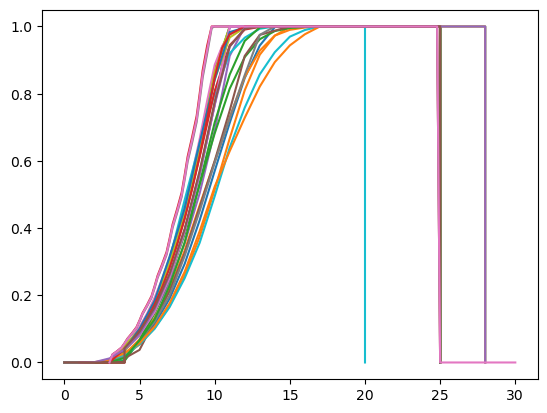

In [27]:
for name in windturbines:
    turbine = get_windturbineconfig(name)
    plt.plot(turbine['V'], turbine['POW']/turbine['P'], label=f"{name}: {turbine['hub_height']}, {turbine['P']}")

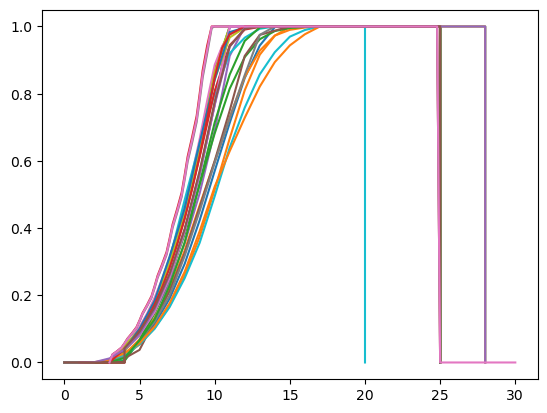

In [27]:
for name in windturbines:
    turbine = get_windturbineconfig(name)
    plt.plot(turbine['V'], turbine['POW']/turbine['P'], label=f"{name}: {turbine['hub_height']}, {turbine['P']}")

In [34]:
cutout = download_era5(2012, 1)
wind_per_turbine = {name: cutout.wind(name) for name in windturbines}

/home/pregner/micromamba/envs/syfop-global-costs/lib/python3.9/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 11.37 s
[########################################] | 100% Completed | 6.16 s
[########################################] | 100% Completed | 4.33 s
[########################################] | 100% Completed | 5.65 s
[########################################] | 100% Completed | 4.86 s
[########################################] | 100% Completed | 4.53 s
[########################################] | 100% Completed | 4.44 s
[########################################] | 100% Completed | 5.25 s
[########################################] | 100% Completed | 4.85 s
[########################################] | 100% Completed | 4.35 s
[########################################] | 100% Completed | 4.25 s
[########################################] | 100% Completed | 4.23 s
[########################################] | 100% Completed | 4.34 s
[########################################] | 100% Completed | 4.33 s
[################################

In [53]:
wind_avg_per_turbine = {turbine: values.mean() for turbine, values in wind_per_turbine.items()}

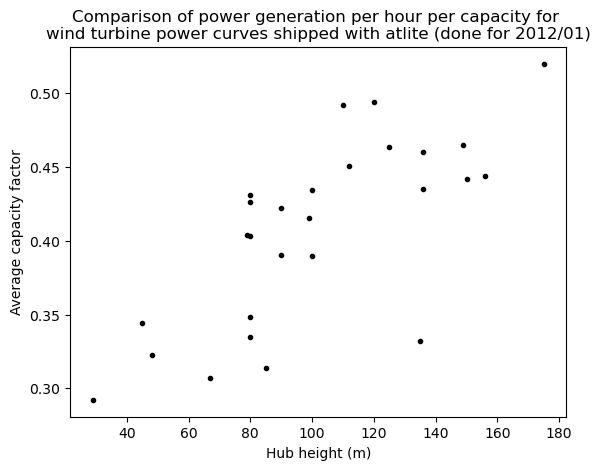

In [70]:
plt.plot(*np.array([(get_windturbineconfig(name)['hub_height'], windavg/cutout.data.sizes['time'])
                    for name, windavg in wind_avg_per_turbine.items()]).T,
         'ok',
         markersize=3)
plt.title('Comparison of power generation per hour per capacity for \nwind turbine power curves shipped with atlite (done for 2012/01)')
plt.xlabel('Hub height (m)');
plt.ylabel('Average capacity factor');

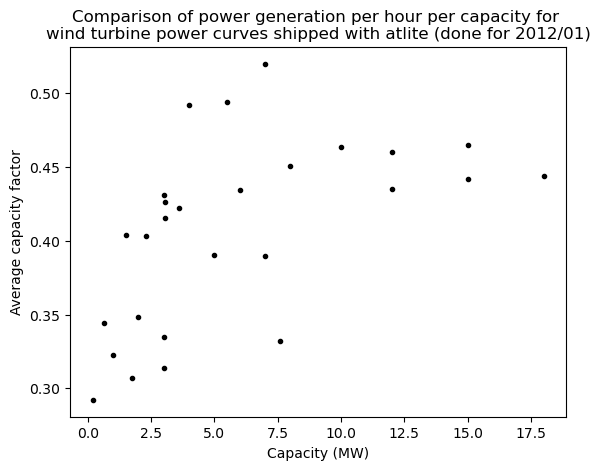

In [71]:
plt.plot(*np.array([(get_windturbineconfig(name)['P'], windavg/cutout.data.sizes['time'])
                    for name, windavg in wind_avg_per_turbine.items()]).T,
         'ok',
         markersize=3)
plt.title('Comparison of power generation per hour per capacity for \nwind turbine power curves shipped with atlite (done for 2012/01)')
plt.xlabel('Capacity (MW)');
plt.ylabel('Average capacity factor');

In [79]:
(max(wind_avg_per_turbine.values()) - min(wind_avg_per_turbine.values()))/min(wind_avg_per_turbine.values())

<xarray.DataArray 'specific generation' ()>
array(0.77943087, dtype=float32)